In [1]:
suppressWarnings(suppressPackageStartupMessages({
    library(Seurat)
    library(Signac)
    library(EnsDb.Hsapiens.v86)
    library(dplyr)
    library(ggplot2)
    library(bedr)
    library(SeuratDisk)
    library(scales)
    library(reshape2)
    library(Hmisc)
    library(tidyr)
    library(tidyverse)
    library(crayon)
    library(SeuratData)
    # library(CelliD)
    library(readr)
}))


# Definitions etc

In [2]:
set.seed(1234)
options(digits = 2)
stats <- c()


In [3]:
if (!exists("papermill_run")) {
    prj_name <- "Screen1_66guides"
    data_subdir_suffixes <- "L1,L2,L3,L4"
    secondary_a_path <- "S1/analysis/secondary/"
    save_seurat_h5 <- "NO"
}


In [4]:
custom_theme <- theme(
  plot.title = element_text(size = 16, hjust = 0.5),
  legend.key.size = unit(0.7, "cm"),
  legend.text = element_text(size = 14)
)


### Load Seurat file

In [5]:
integrated_h5_path <- "S1/analysis/secondary/" %+%
    "integrated/seurat_objects/integrated_wo_guide_calls.h5seurat"
seurat_combined <- LoadH5Seurat(integrated_h5_path, verbose = FALSE)


Validating h5Seurat file



Warning message:
"Adding a command log without an assay associated with it"


In [6]:
sum(seurat_combined$status == "singlet")
sum(seurat_combined@misc$stats$Doublets_in_filtered_cells)


[1] 27142

[1] 2926

# Visualization


Use only singlets

In [7]:
seurat_combined_singlets <- subset(
    seurat_combined,
    subset = status == "singlet"
)


### Check if libraries, donors or mito conents drive clustering

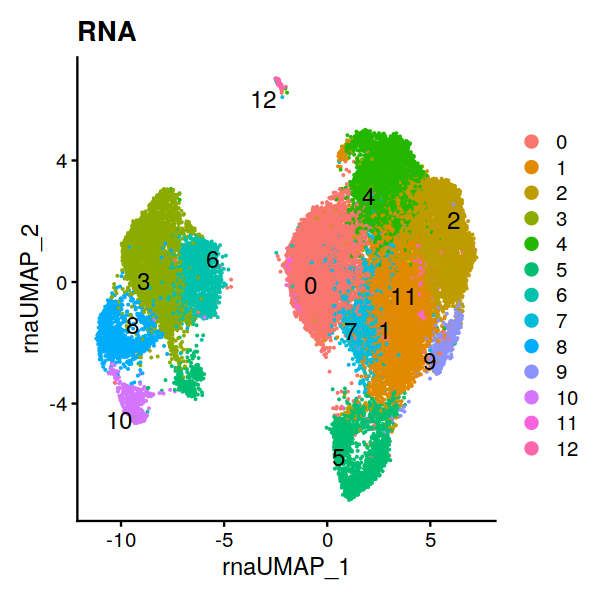

In [8]:
p1 <- DimPlot(
    seurat_combined_singlets,
    reduction = "umap.rna", label = TRUE, label.size = 5, repel = TRUE
) + ggtitle("RNA")

options(repr.plot.width = 5, repr.plot.height = 5)
p1


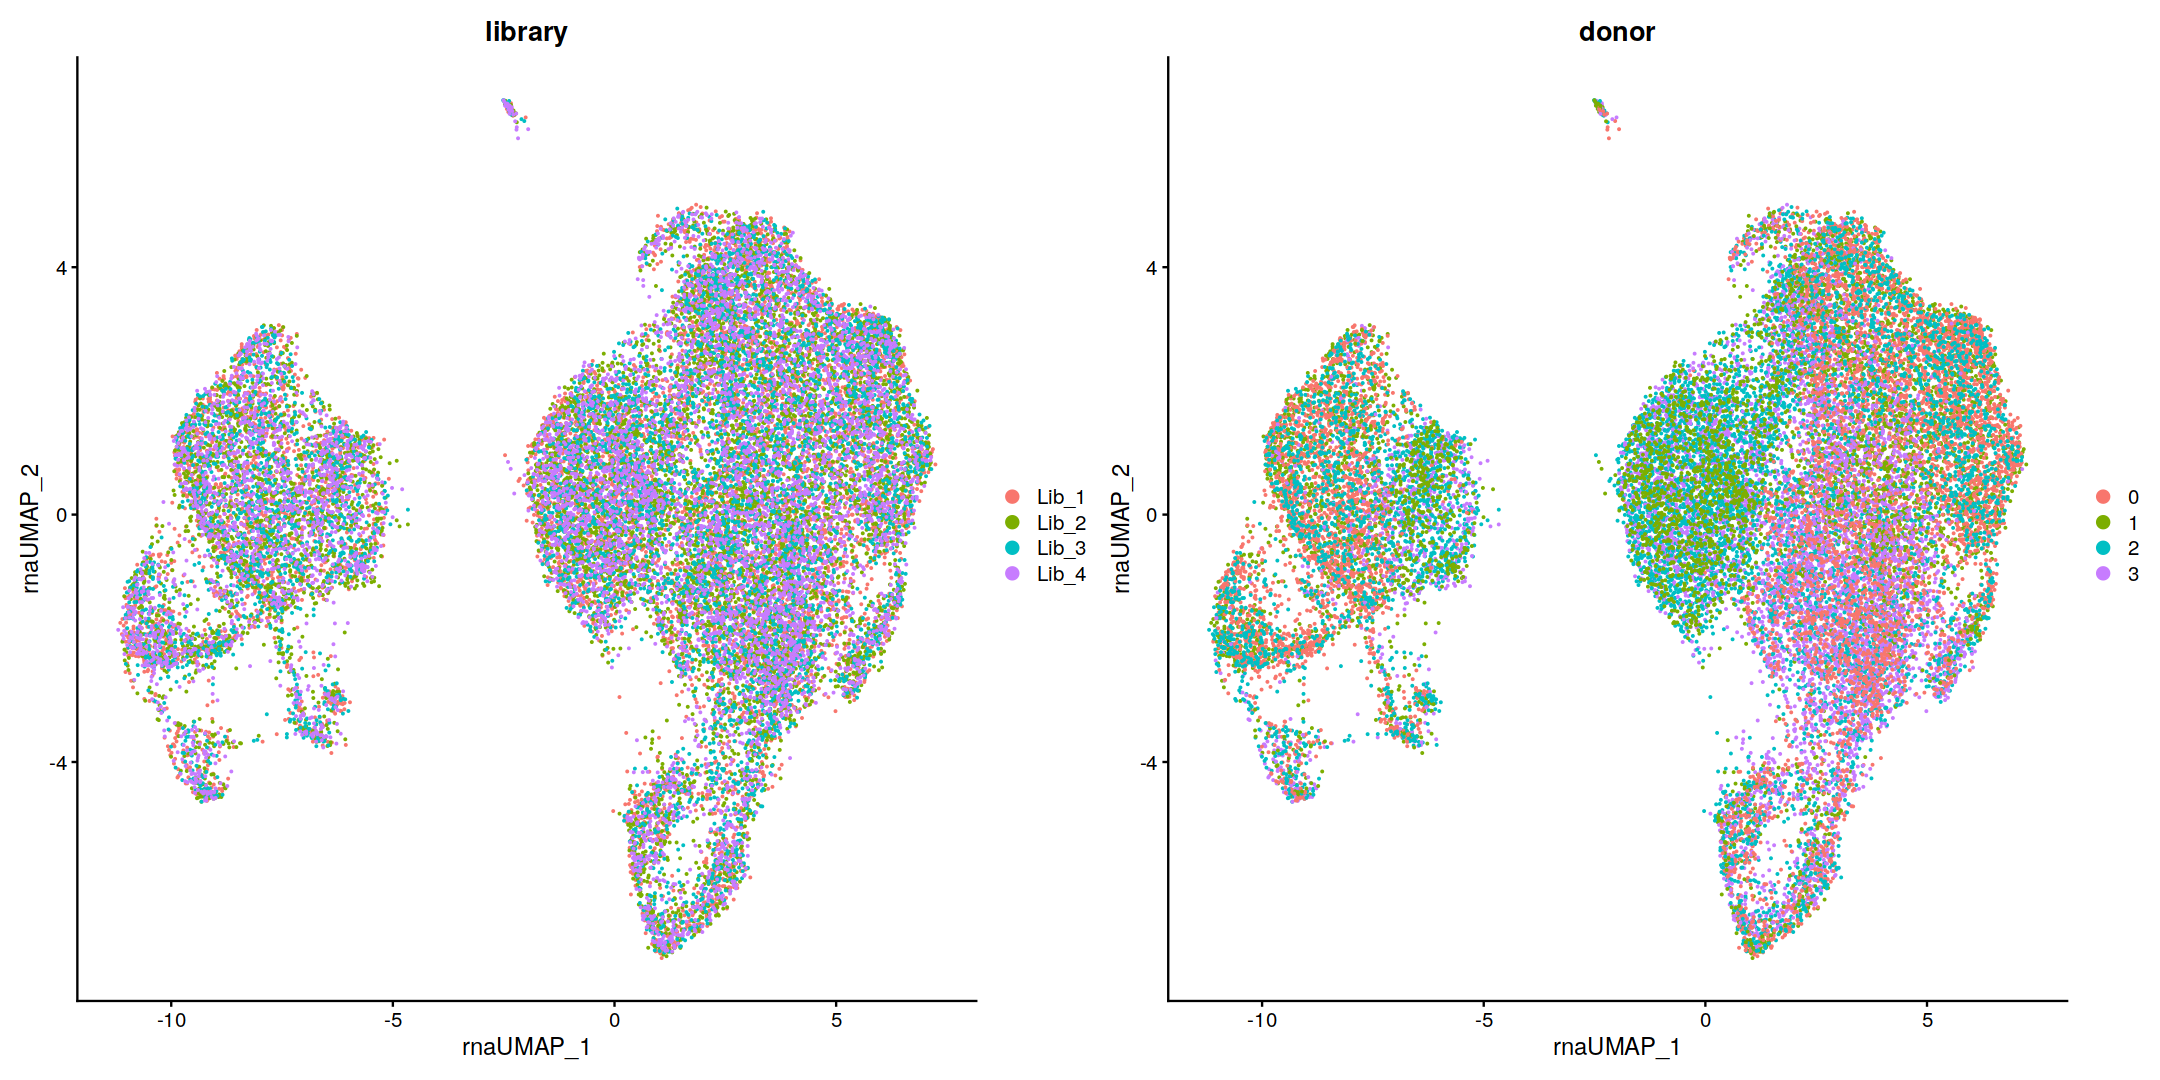

In [9]:
options(repr.plot.width = 18, repr.plot.height = 9)

p1 <- DimPlot(
    seurat_combined_singlets,
    reduction = "umap.rna", group.by = "library"
)
p2 <- DimPlot(
    seurat_combined_singlets,
    reduction = "umap.rna", group.by = "donor", label = FALSE, size = .01
)

p1 + p2


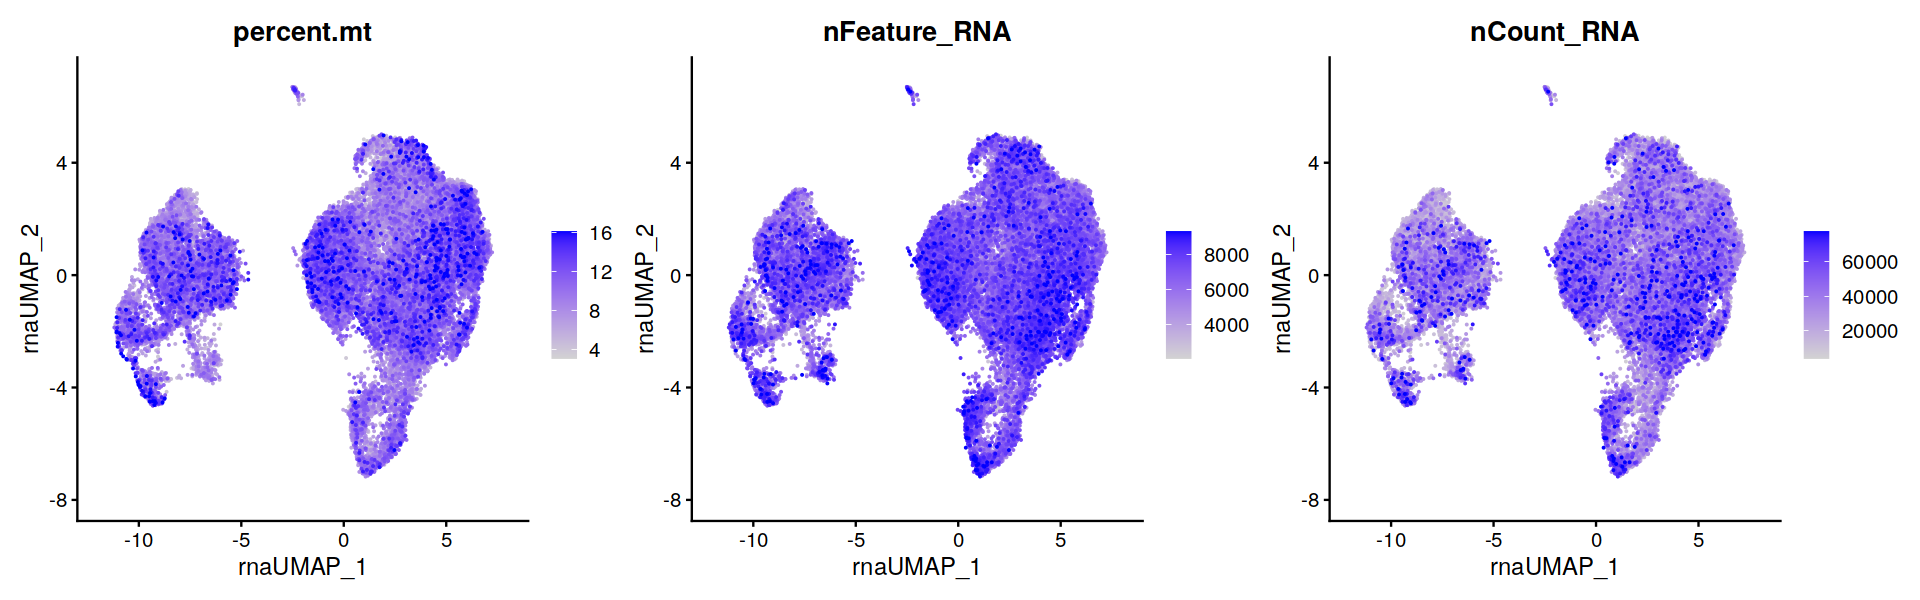

In [10]:
options(repr.plot.width = 16, repr.plot.height = 5)
FeaturePlot(
    seurat_combined_singlets,
    reduction = "umap.rna",
    features = c("percent.mt", "nFeature_RNA", "nCount_RNA"),
    min.cutoff = NA,
    max.cutoff = "q99",
    order = T,
    ncol = 3
)


### Plot markers

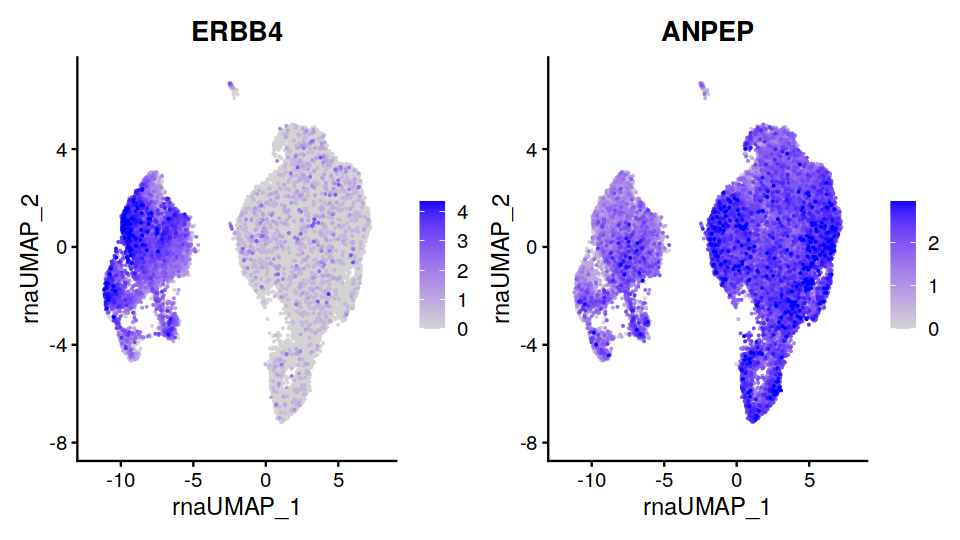

In [11]:
options(repr.plot.width = 8, repr.plot.height = 4.5)
FeaturePlot(
    seurat_combined_singlets,
    reduction = "umap.rna",
    features = c("ERBB4", "ANPEP"),
    min.cutoff = NA,
    max.cutoff = "q99", order = T
)


### Plot some distal tubular markers

Warning message in FeaturePlot(seurat_combined_singlets, reduction = "umap.rna", :
"All cells have the same value (0) of AVPR2."


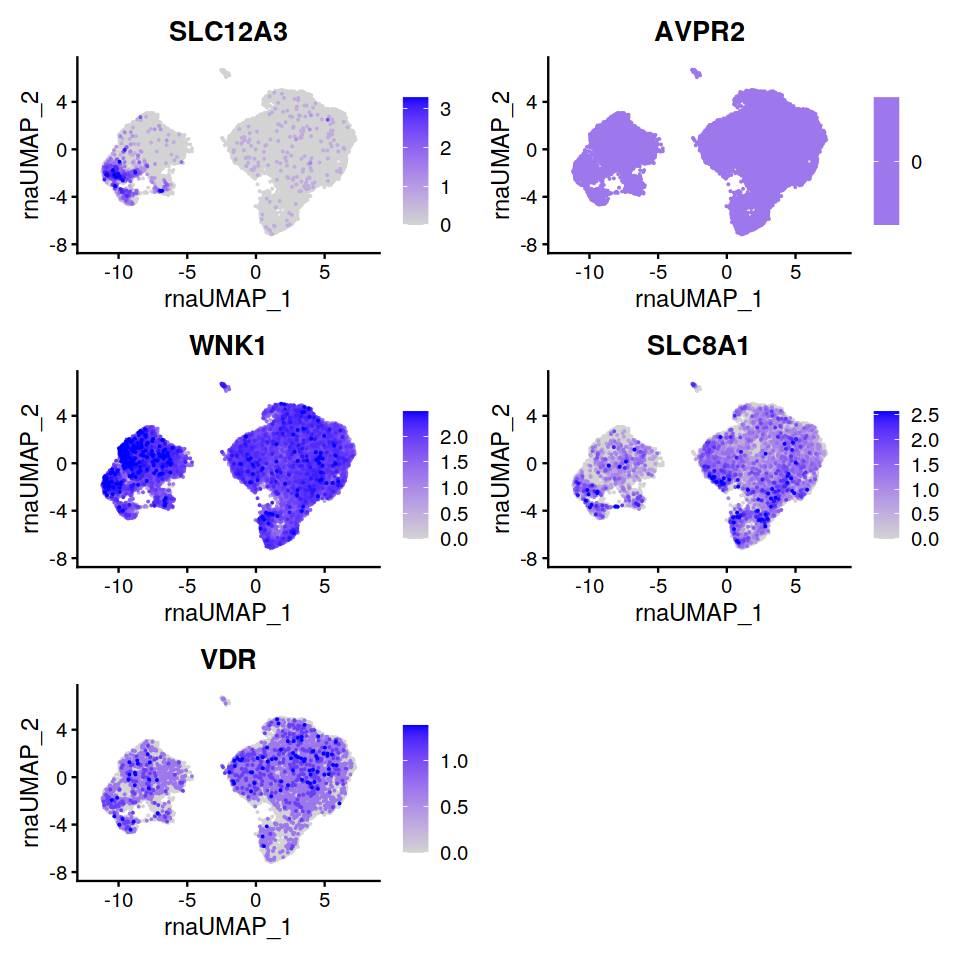

In [12]:
options(repr.plot.width = 8, repr.plot.height = 8)
FeaturePlot(
    seurat_combined_singlets,
    reduction = "umap.rna",
    features = c("SLC12A3", "AVPR2", "WNK1", "SLC8A1", "VDR"),
    min.cutoff = NA,
    max.cutoff = "q99", order = T
)


### Plot some proximal tubular markers

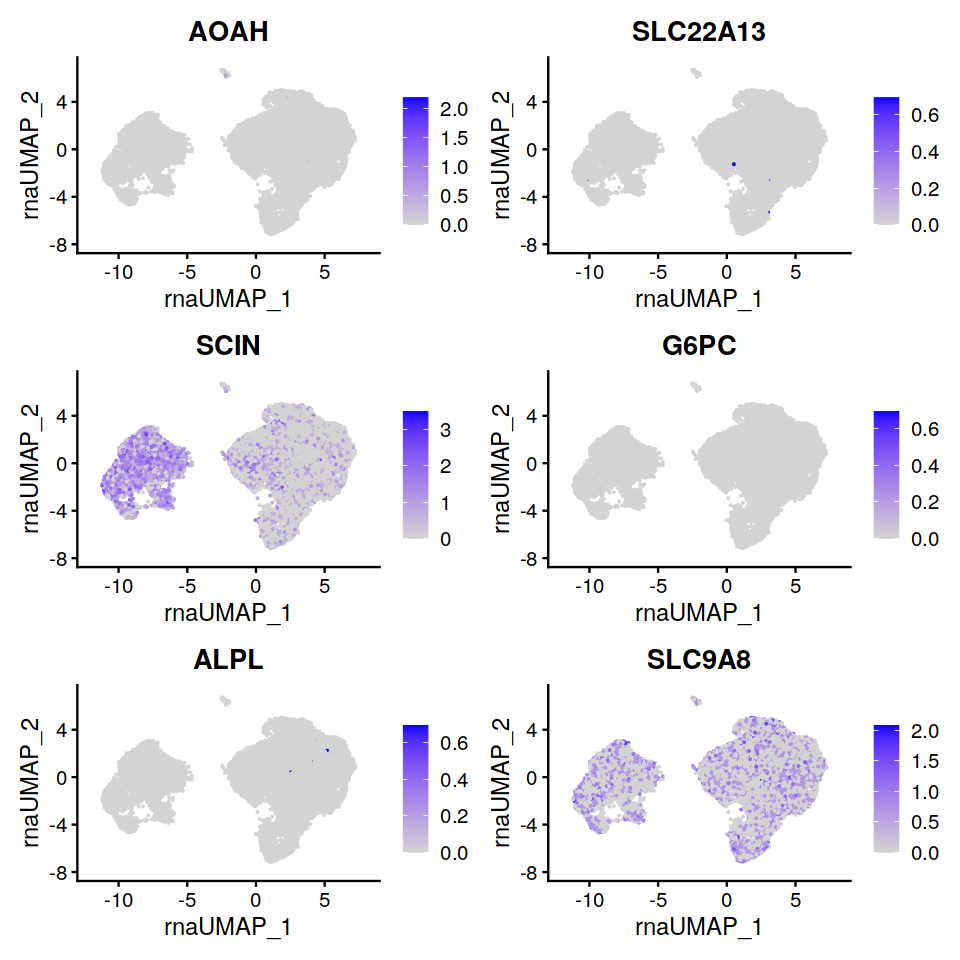

In [13]:
options(repr.plot.width = 8, repr.plot.height = 8)
FeaturePlot(
    seurat_combined_singlets,
    reduction = "umap.rna",
    features = c("AOAH", "SLC22A13", "SCIN", "G6PC", "ALPL", "SLC9A8")
)
# min.cutoff = NA,
# max.cutoff = "q95", order=T)


### Plot TSS controls

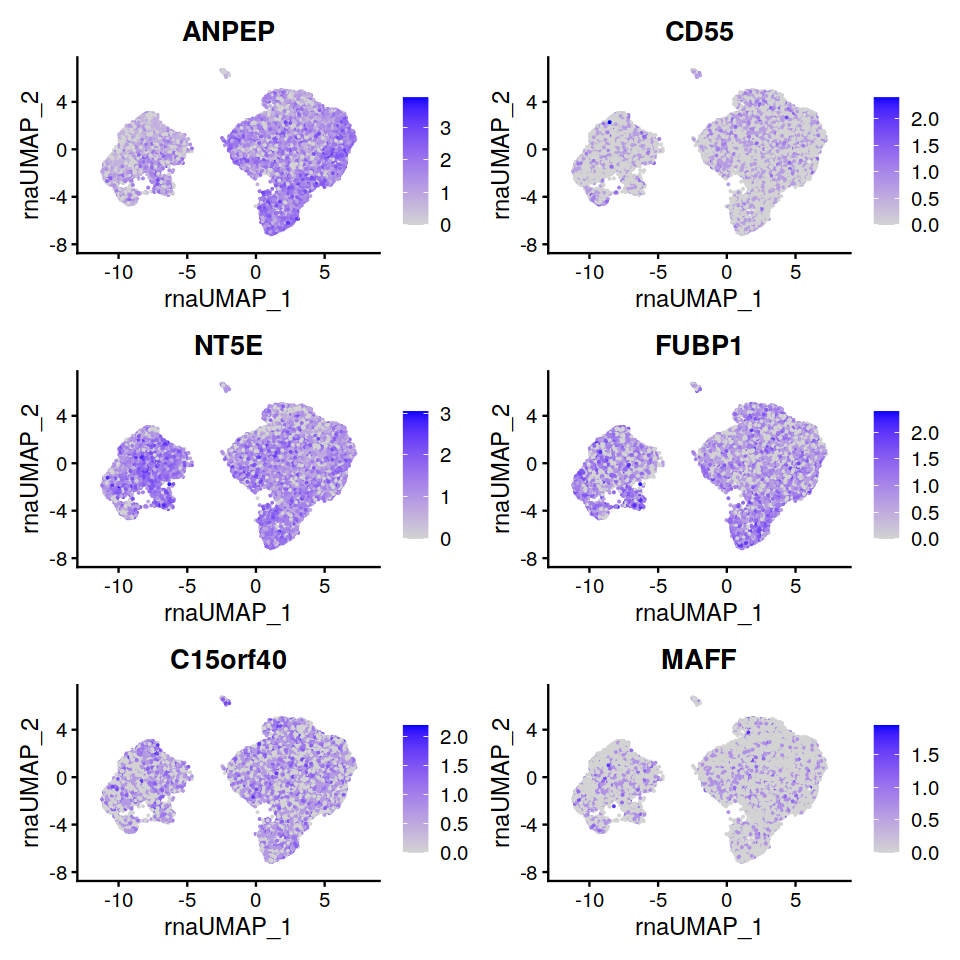

In [14]:
options(repr.plot.width = 8, repr.plot.height = 8)
FeaturePlot(
    seurat_combined_singlets,
    reduction = "umap.rna",
    features = c("ANPEP", "CD55", "NT5E", "FUBP1", "C15orf40", "MAFF")
)
# min.cutoff = NA,
# max.cutoff = "q95", order=T)


In [15]:
s.genes <- cc.genes$s.genes
g2m.genes <- cc.genes$g2m.genes

seurat <- CellCycleScoring(
    seurat_combined_singlets,
    s.features = s.genes,
    g2m.features = g2m.genes,
    set.ident = TRUE,
    assay = "SCT"
)


Warning message:
"The following features are not present in the object: MLF1IP, not searching for symbol synonyms"
Warning message:
"The following features are not present in the object: FAM64A, HN1, not searching for symbol synonyms"


Warning message in PrepDR(object = object, features = features, verbose = verbose):
"The following 32 features requested have not been scaled (running reduction without them): MCM5, MCM2, UNG, MCM6, CDCA7, PRIM1, MLF1IP, RFC2, RPA2, SLBP, CCNE2, UBR7, POLD3, MSH2, RAD51, CDC45, CDC6, EXO1, TIPIN, DSCC1, CASP8AP2, CHAF1B, E2F8, FAM64A, HN1, CDC25C, RANGAP1, PSRC1, CKAP5, CTCF, G2E3, CBX5"


PC_ 1 
Positive:  POLA1, WDR76, UHRF1, GAS2L3, FEN1, DTL, BLM, LBR, PCNA, GMNN 
	   USP1, GINS2, MCM4, BRIP1, HELLS, NCAPD2, RRM1, CENPA, ANP32E, ATAD2 
	   NASP, RAD51AP1, ECT2, CDCA3, CKAP2, AURKB, NEK2, TTK, TMPO, TYMS 
Negative:  CENPF, TOP2A, MKI67, HMGB2, TPX2, HMMR, NUSAP1, DLGAP5, UBE2C, ANLN 
	   CDK1, CKS2, GTSE1, CENPE, HJURP, RRM2, KIF20B, CDC20, TUBB4B, BIRC5 
	   AURKA, SMC4, KIF2C, TACC3, KIF11, NUF2, KIF23, CDCA2, NDC80, CCNB2 
PC_ 2 
Positive:  CLSPN, RRM2, ATAD2, HELLS, BRIP1, DTL, NASP, WDR76, MCM4, GINS2 
	   TYMS, UHRF1, PCNA, FEN1, GMNN, POLA1, USP1, BLM, RAD51AP1, RRM1 
	   TMPO, AURKB, ANLN, SMC4, KIF11, MKI67, CDK1, TACC3, CDCA2, CKAP2L 
Negative:  CENPF, CKS2, DLGAP5, HMMR, CDC20, AURKA, UBE2C, CCNB2, NEK2, NUSAP1 
	   TPX2, BIRC5, CENPE, CDCA3, CENPA, KIF20B, CKAP2, GTSE1, BUB1, KIF2C 
	   TUBB4B, NUF2, LBR, TOP2A, TTK, NCAPD2, CKS1B, ANP32E, GAS2L3, KIF23 
PC_ 3 
Positive:  CENPF, CDC20, TUBB4B, BIRC5, CKS2, DLGAP5, CCNB2, NASP, HMMR, ANP32E 
	   HMGB2, TYMS

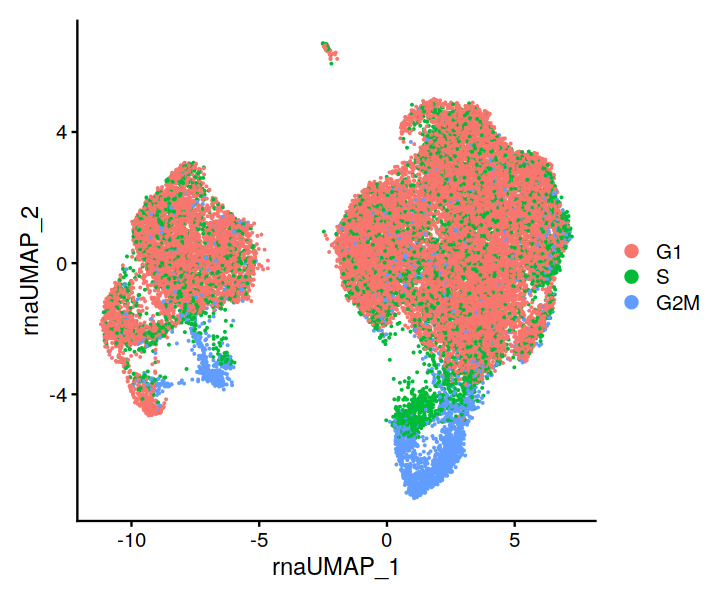

In [16]:
DefaultAssay(seurat_combined_singlets) <- "SCT"
seurat_new <- RunPCA(
    seurat_combined_singlets,
    npcs = 20,
    features = c(s.genes, g2m.genes)
)
options(repr.plot.width = 6, repr.plot.height = 5)
DimPlot(seurat)


### Split by library

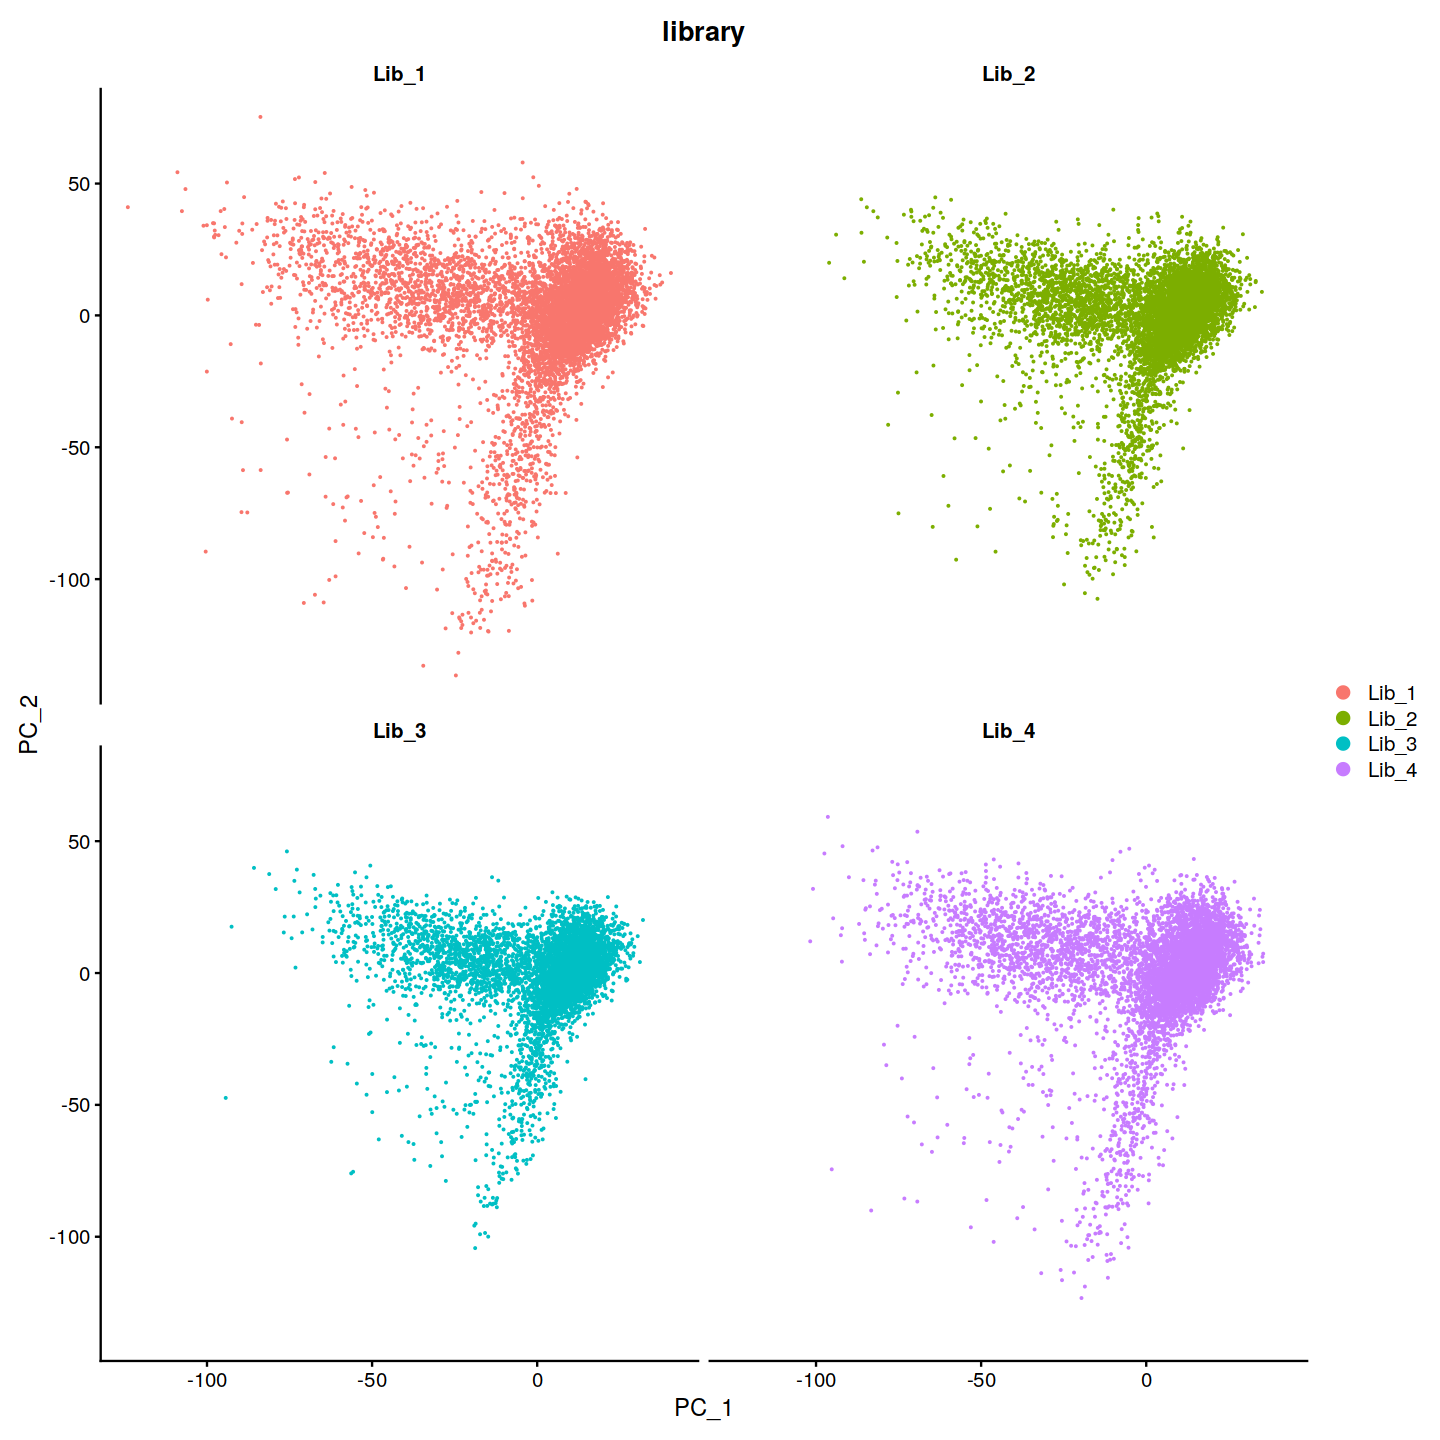

In [17]:
options(repr.plot.width = 12, repr.plot.height = 12)
PCAPlot(
    seurat_combined_singlets,
    group.by = "library",
    split.by = "library",
    ncol = 2
)
